# Homework 4 Part 2 - Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Problem 1 - Support Vector Machine

In this problem you will be working with 3 different synthetically generated datasets, experiment with different parameters of the SVM classifiers and draw conclusions about its behavior.

Consider the following 3 2-class datasets (X1, X2, and X3):

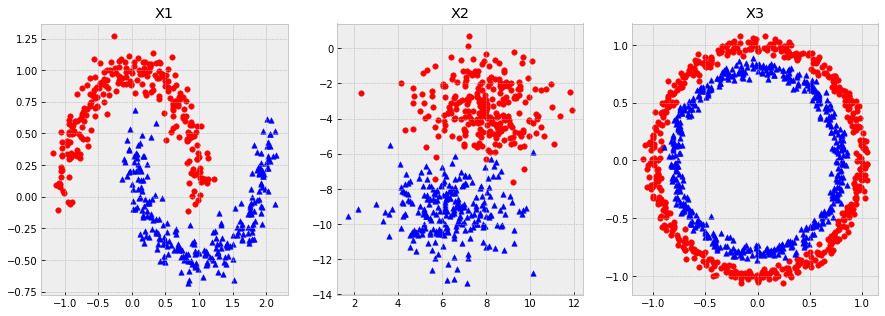

In [93]:
# Generate Synthetic Data
from sklearn.datasets import make_moons, make_blobs, make_circles
X1, y1 = make_moons(n_samples=500, noise=0.1, random_state=6)
X2, y2 = make_blobs(n_samples=500, centers=2, cluster_std = 1.5, random_state=6)
X3, y3 = make_circles(n_samples=1000, noise=0.04, random_state=6)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X1[y1==0,0],X1[y1==0,1],marker='o',c='r',s=30)
plt.scatter(X1[y1==1,0],X1[y1==1,1],marker='^',c='b',s=30)
plt.title('X1')

plt.subplot(1,3,2)
plt.scatter(X2[y2==0,0],X2[y2==0,1],marker='o',c='r',s=30)
plt.scatter(X2[y2==1,0],X2[y2==1,1],marker='^',c='b',s=30)
plt.title('X2')

plt.subplot(1,3,3)
plt.scatter(X3[y3==0,0],X3[y3==0,1],marker='o',c='r',s=30)
plt.scatter(X3[y3==1,0],X3[y3==1,1],marker='^',c='b',s=30)
plt.title('X3');

In the script provided below, provide:

* The dataset you will be experimenting with (X1 and y1, X2 and y2, or X3 and y3).
* Kernel used in SVM (rbf, polynomial, linear or sigmoid).
* Parameter C in SVM.

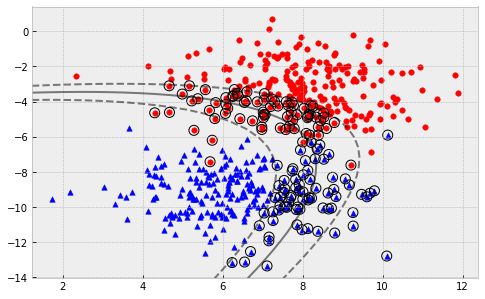

In [90]:
from sklearn import svm

### Dataset ###
X = X2 # choose the input data (X1, X2 or X3)
y = y2 # choose the correspondent target labels (y1, y2 or y3, respectively)

### Fit the Model###
# don't regularize for illustration purposes
kernel = 'sigmoid' # Change the kernel to "rbf", "poly", "linear" or "sigmoid"
# if you use the polynomial kernel, you may control its degree using the parameter "degree"
C = 1 # Change the value for the parameter C
clf = svm.SVC(kernel=kernel, C=C)
clf.fit(X, y)


### Decision Surface ###
plt.figure(figsize=(8,5))
plt.scatter(X[y==0,0],X[y==0,1],marker='o',c='r',s=30)
plt.scatter(X[y==1,0],X[y==1,1],marker='^',c='b',s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30) # you may change the x-axis range
yy = np.linspace(ylim[0],ylim[1], 30) # you may change the y-axis range
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
);

Provide a paragraph description for the following questions:

1. Describe the effects on the width of the margin as you change the parameter $C$.

2. Describe the effects on the number of support vectors as you change the parameter $C$.

3. Describe the effects on the decision surface, namely its non-linearity as you change the parameter $C$.

4. If the test data will have the same statistical properties as the training data, which kernel would you choose to use for each dataset? Justify your answer based on (1) computational complexity, (2) ease of use, (3) overall effects on decision surface, and (4) any other parameter choices.

5. Predict which label the following point will be assigned to for several configurations of values for $C$ and kernel function used:
    * $[2,-2]$ for dataset X1
    * $[12,-15]$ for dataset X2
    * $[1,-1]$ for dataset X3

1. The margin width increases as the value of $C$ decreases. This allows for more points to enter the margin or be misclassified.
2. The number of support vectors also increases as the value of $C$ decreases.
3. The decision surface becomes non-linear as the value of $C$ increases, unless the kernel function used is the linear kernel.
4. For $X_1$, both the RBF and the polynomial kernel learn the data. The polynomial kernel with finite model order may be preferred as it allows for better generalization. For $X_2$, a linear kernel allows for a sufficiently good separation, and it is much simpler and generalizable than the RBF kernel. For $X_3$ a quadratic polynomial kernel will suffice to correctly learn the decision surface for this data.
5. Multiple answers are accepted depending on the kernels selected.

# Problem 2 - Learning Strategies

**In this problem, you will be working with the data set "UF Network" shown below (make sure you download the file "UF_network.npy"):**

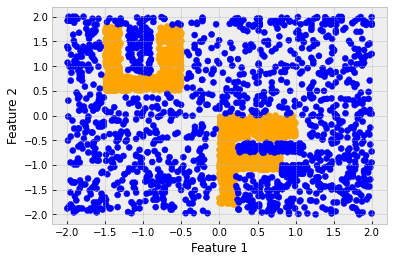

In [2]:
from matplotlib.colors import ListedColormap

UF_network = np.load('UF_network.npy')
X = UF_network[:,:2]
y = UF_network[:,2]

cm = ListedColormap(['blue', 'orange'])
plt.scatter(X[:,0],X[:,1],c=y, cmap=cm);
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

**The following function will be helpful for plotting the decision boundary of your trained model.**

In [3]:
def plot_LC_and_DB(X, model):
    '''This function will plot the learning curve and decision boundary
    for a given trained model and training data X.
    model: is a sklearn model structure
    X: training data'''
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
    
    fig = plt.figure(figsize=(15,5))
    fig.add_subplot(1,2,1)
    plt.plot(model.loss_curve_)
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Function')

    cm = ListedColormap(['blue', 'orange'])
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    fig.add_subplot(1,2,2)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8);
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show();

**For this problem, you will need to create a 2-hidden layer network to distinguish the letters and the background. Starter code is provided for you in the cell below, which uses ```scikit-learn``` library.**

**You will need to determine:**

(1) **the number of neurons (or units) for each hidden layer,**
(2) **the learning rate, and**
(3) **number of epochs.**

**Answer the following questions:**

1. **How many units will you need in the first and second hidden layers? Why? Justify your answer by providing an explanation of each hidden unit role in creating the UF network.**

2. **Can you achieve the same goal with a *single hidden layer network*? Why or why not?**

3. **Using the starter code below, select three different learning rates and number of epochs. Report the results on the values selected. Generate the (a) learning curve and (b) decision boundary for the top three combinations of the different learning rates and number of epochs (total of 6 figures).**

4. **For the best learning rate and number epochs from the above plots, provide discussion on the (a) influence of each hyperparameter on training performance and (b) why the selected values worked well.**

### Part 1 & 2

1. The first hidden layer will need at least 16 neurons in order to define the edges of each letter (7 for letter U and 9 for letter F). The second hidden layer will need at least 6 neurons in order to combine all decision boundaries into 6 convex shapes (3 for letter U and 3 for letter F).

2. Yes, according to the Approximation Theorem, we can achieve the same goal with a single hidden layer network. However, we would need an incredibly large number of units in the hidden layer.

### Part 3

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Do not change these parameters
net = MLPClassifier(activation='tanh',
                    n_iter_no_change = 1000)

C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  16
Learning Rate:  0.01
Number of Epochs:  100
Accuracy =  87.4 %
-----------------------------------


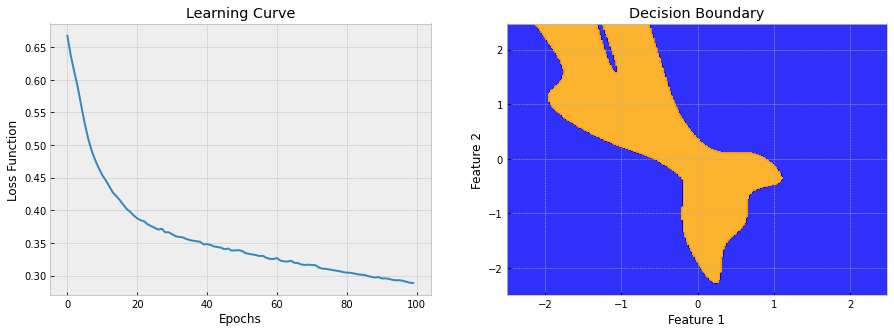

C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  16
Learning Rate:  0.01
Number of Epochs:  1000
Accuracy =  99.27 %
-----------------------------------


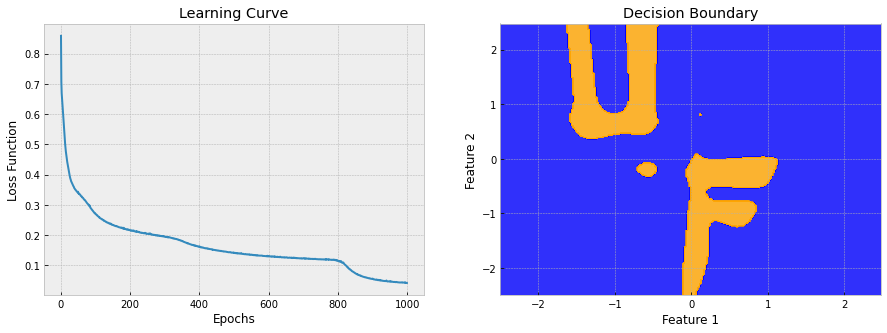

-----------------------------------
Hidden Layer Architecture:  16
Learning Rate:  0.01
Number of Epochs:  10000
Accuracy =  99.9 %
-----------------------------------


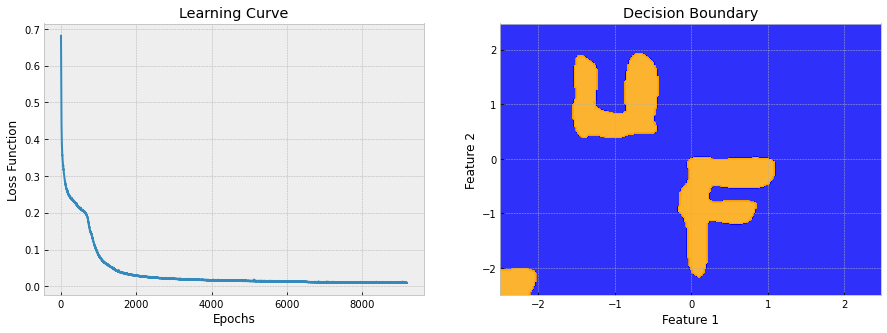

-----------------------------------
Hidden Layer Architecture:  16
Learning Rate:  0.01
Number of Epochs:  100000
Accuracy =  99.7 %
-----------------------------------


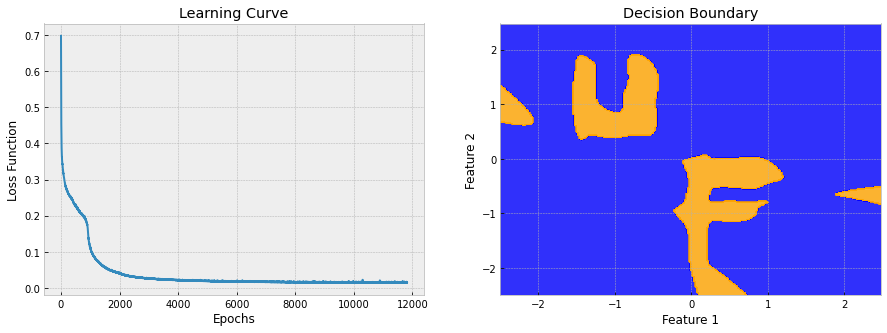

-----------------------------------
Hidden Layer Architecture:  16
Learning Rate:  0.001
Number of Epochs:  100
Accuracy =  81.0 %
-----------------------------------


C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


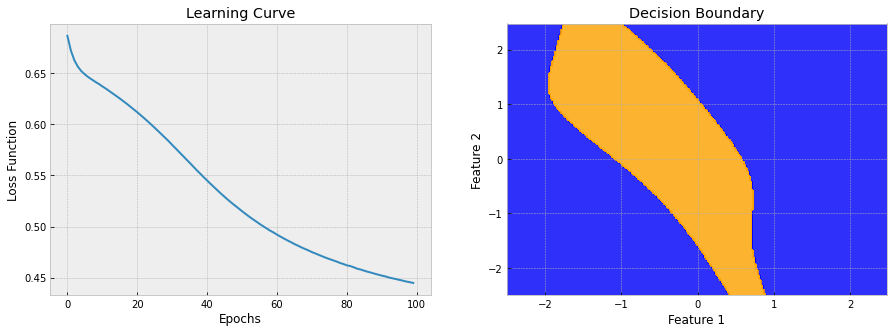

-----------------------------------
Hidden Layer Architecture:  16
Learning Rate:  0.001
Number of Epochs:  1000
Accuracy =  88.5 %
-----------------------------------


C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


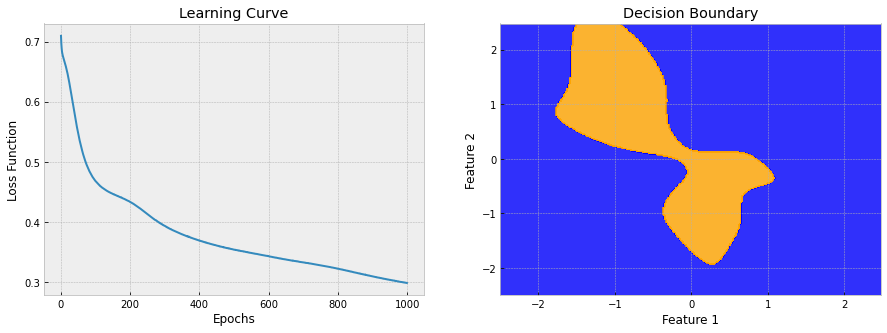

-----------------------------------
Hidden Layer Architecture:  16
Learning Rate:  0.001
Number of Epochs:  10000
Accuracy =  94.3 %
-----------------------------------


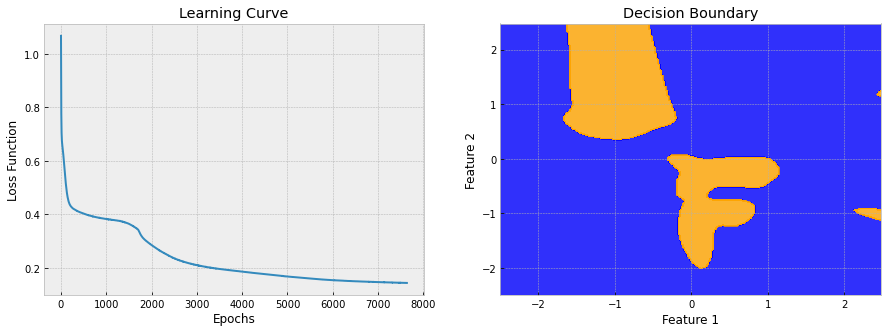

-----------------------------------
Hidden Layer Architecture:  16
Learning Rate:  0.001
Number of Epochs:  100000
Accuracy =  94.83 %
-----------------------------------


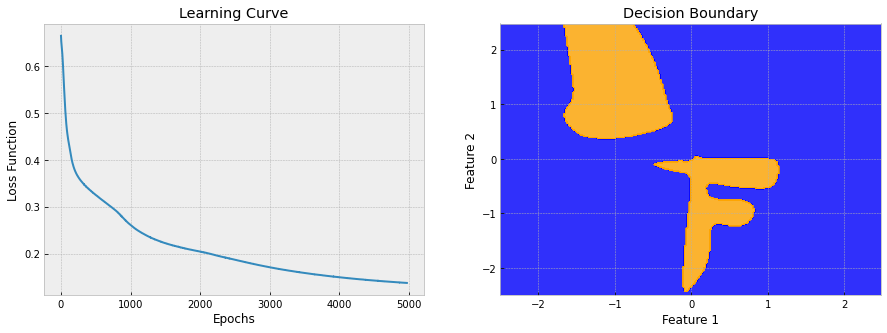

-----------------------------------
Hidden Layer Architecture:  16
Learning Rate:  0.0001
Number of Epochs:  100
Accuracy =  56.3 %
-----------------------------------


C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


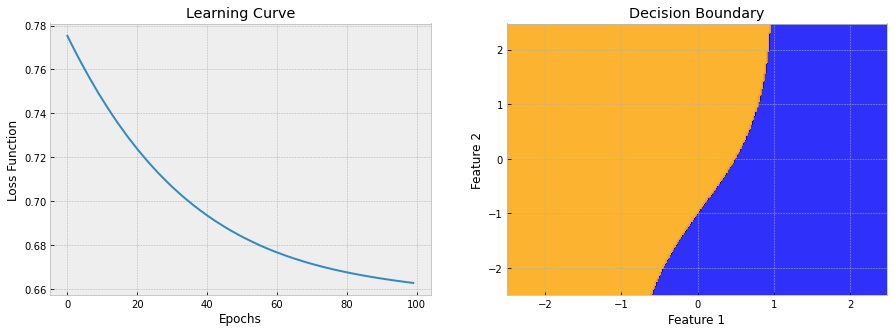

C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  16
Learning Rate:  0.0001
Number of Epochs:  1000
Accuracy =  81.37 %
-----------------------------------


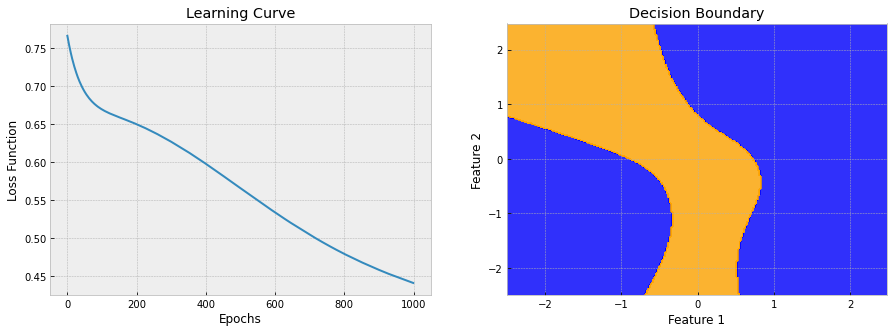

-----------------------------------
Hidden Layer Architecture:  16
Learning Rate:  0.0001
Number of Epochs:  10000
Accuracy =  84.33 %
-----------------------------------


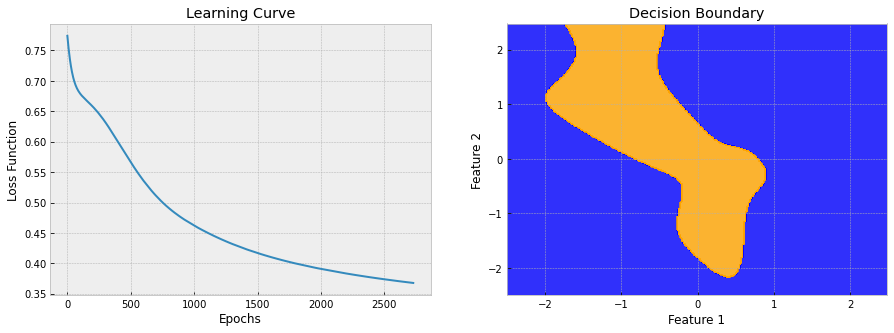

-----------------------------------
Hidden Layer Architecture:  16
Learning Rate:  0.0001
Number of Epochs:  100000
Accuracy =  83.33 %
-----------------------------------


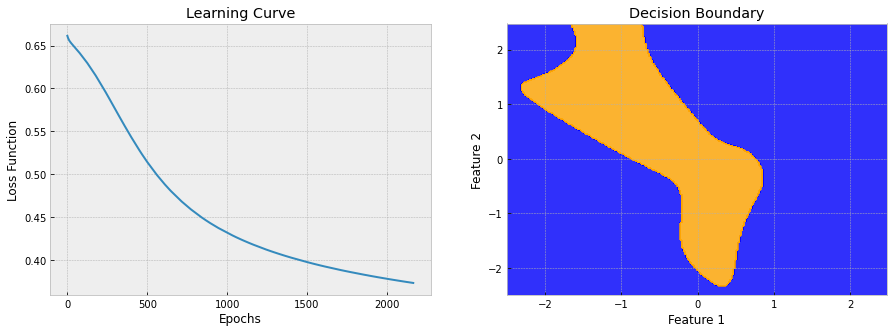

C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.01
Number of Epochs:  100
Accuracy =  92.07 %
-----------------------------------


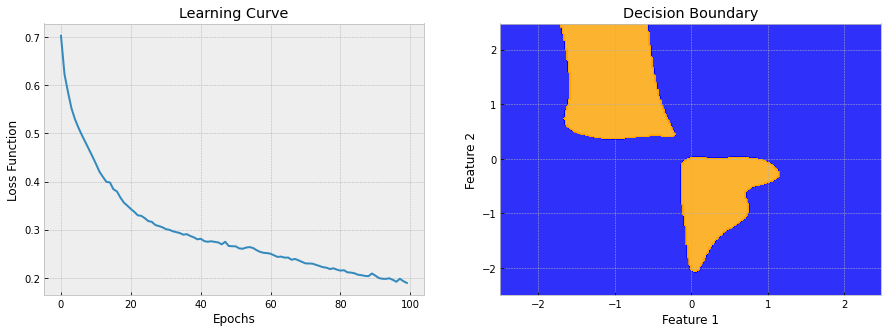

C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.01
Number of Epochs:  1000
Accuracy =  99.67 %
-----------------------------------


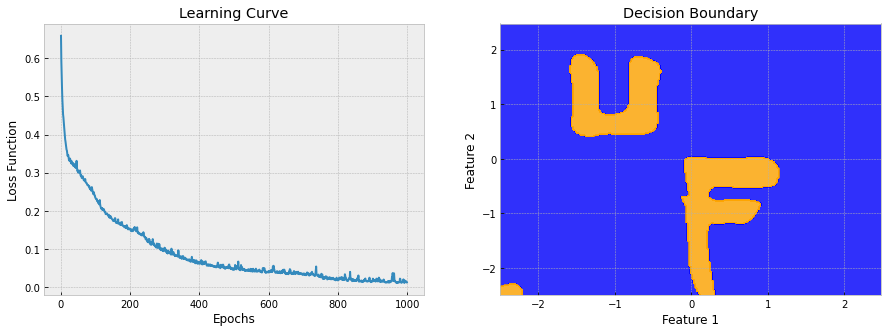

-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.01
Number of Epochs:  10000
Accuracy =  100.0 %
-----------------------------------


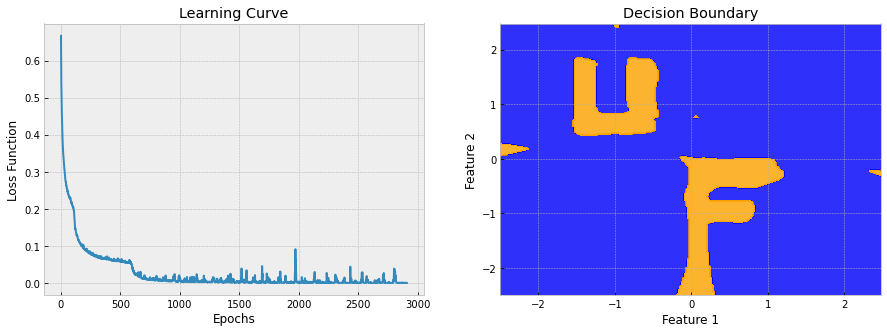

-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.01
Number of Epochs:  100000
Accuracy =  100.0 %
-----------------------------------


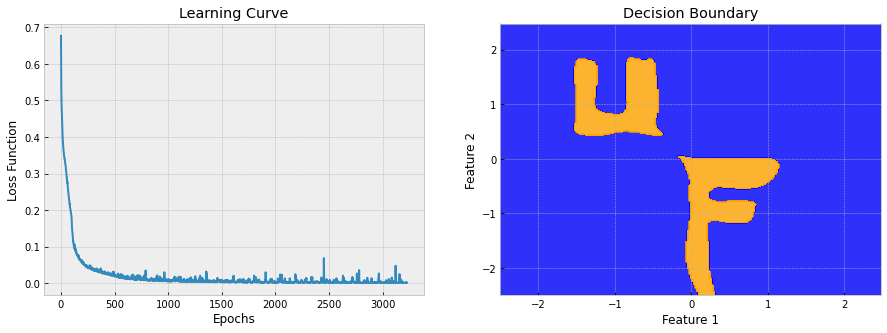

C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.001
Number of Epochs:  100
Accuracy =  83.33 %
-----------------------------------


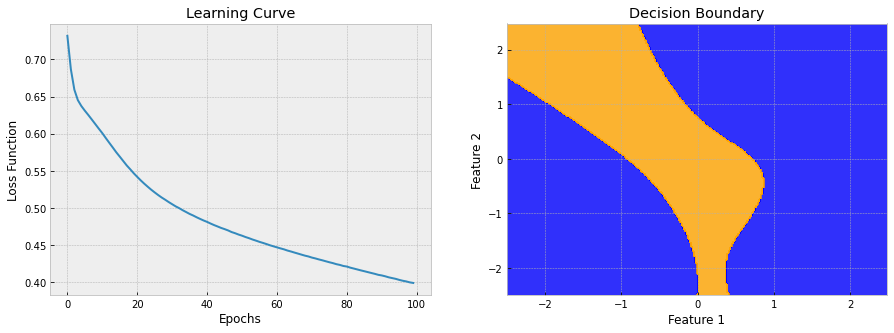

C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.001
Number of Epochs:  1000
Accuracy =  94.43 %
-----------------------------------


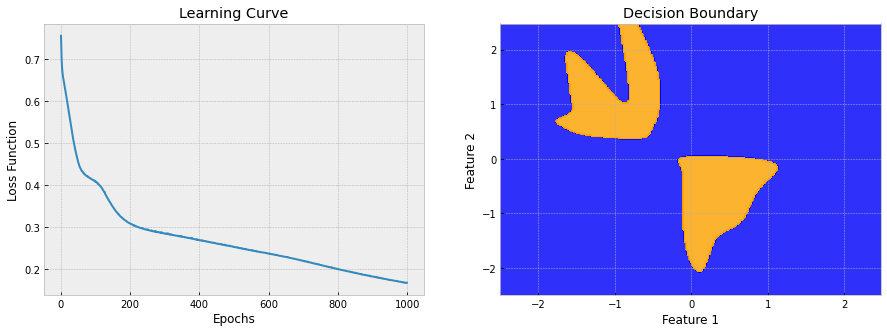

-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.001
Number of Epochs:  10000
Accuracy =  99.97 %
-----------------------------------


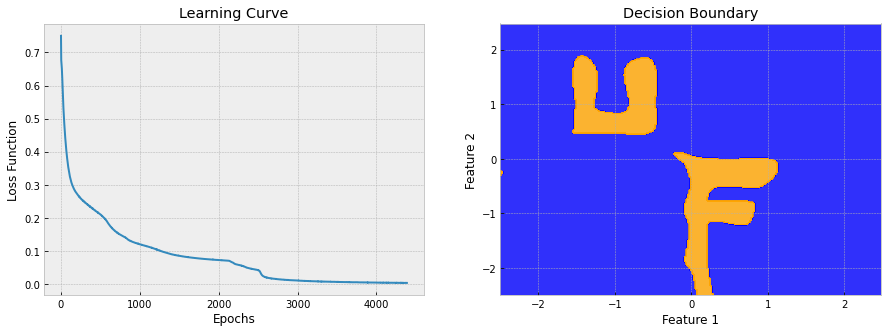

-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.001
Number of Epochs:  100000
Accuracy =  99.97 %
-----------------------------------


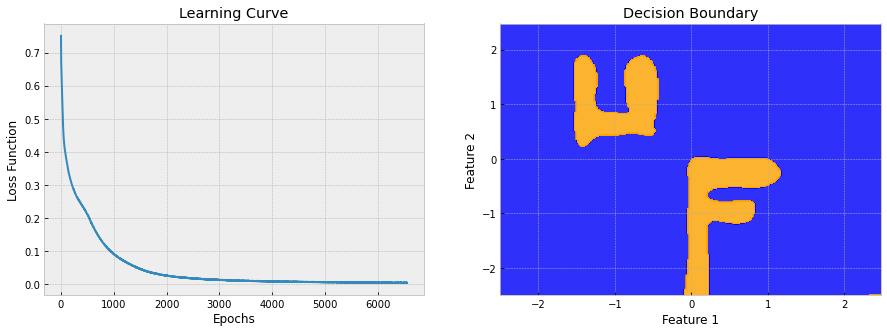

C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.0001
Number of Epochs:  100
Accuracy =  65.83 %
-----------------------------------


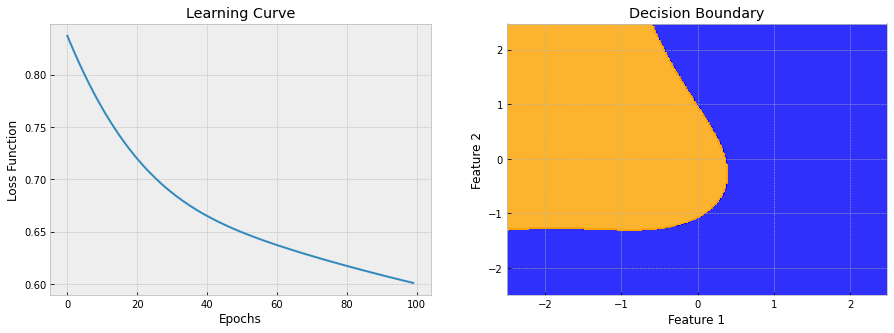

C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.0001
Number of Epochs:  1000
Accuracy =  82.37 %
-----------------------------------


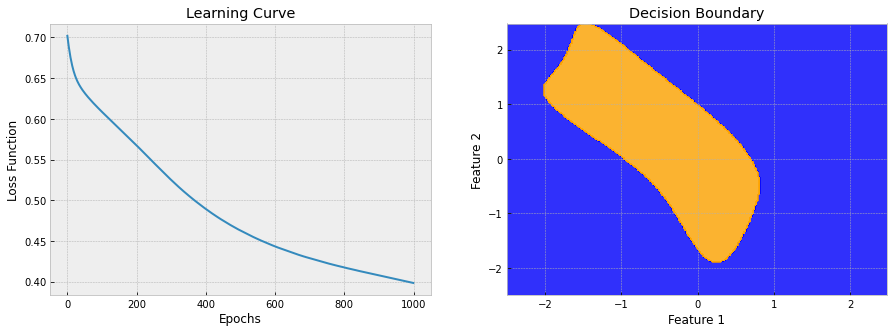

-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.0001
Number of Epochs:  10000
Accuracy =  95.93 %
-----------------------------------


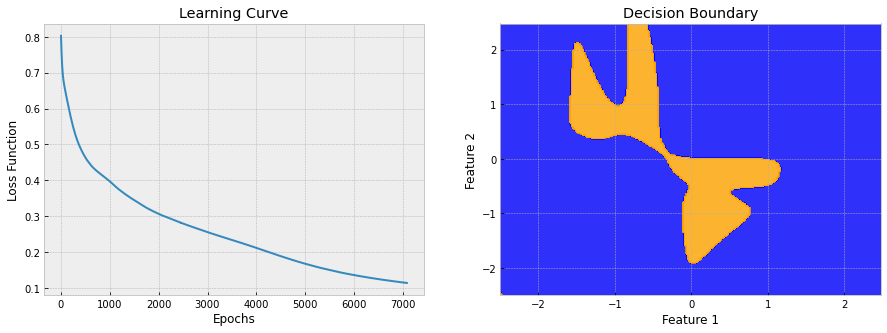

-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.0001
Number of Epochs:  100000
Accuracy =  89.33 %
-----------------------------------


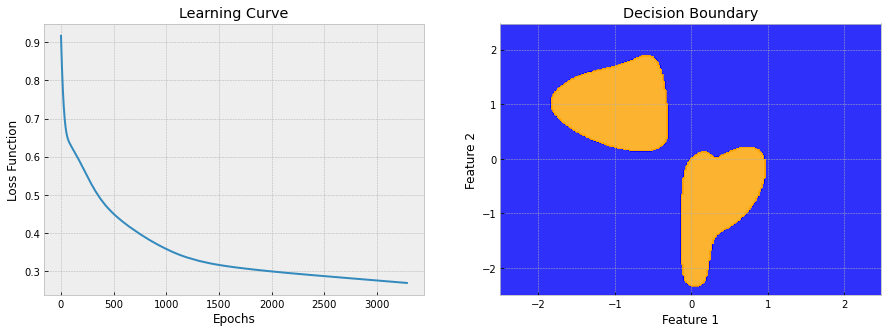

In [5]:
# Create a list with your own set of values for all of these parameters
net_hidden_layers = [(16),(16,6)]
net_learning_rate = [0.01, 0.001, 0.0001]
epochs = [100,1000, 10_000, 100_000]

for i in net_hidden_layers:
    for j in net_learning_rate:
        for k in epochs:
            net.set_params(hidden_layer_sizes = i, learning_rate_init = j, max_iter = k)
            net.fit(X, y)
            y_pred = net.predict(X)

            acc_score = accuracy_score(y, y_pred)
            print('-----------------------------------')
            print('Hidden Layer Architecture: ', i)
            print('Learning Rate: ', j)
            print('Number of Epochs: ', k)
            print('Accuracy = ', np.round(acc_score*100,2),'%')
            print('-----------------------------------')
            plot_LC_and_DB(X, net)

### Part 4

From the results above, we can see that when the learning rate is larger ($\eta = 0.01$), the speed of convergence is much faster but as it gets closer to a solution there is some instability as the learning rate does not reduce sufficiently in order to stabilize and convergence to a solution.

This scenario is observed as the number of epochs increases as well. The learning behavior becomes more chaotic as the solutions is making larger jumps in an area around a local minima.

When the learning rate decreases to $\eta = 0.001$ for a small number of epochs, 1000 epochs, the learning curve is smooth but it has not yet converged. We can see that the curve is still decreasing and therefore the solution arrive at 1000 epochs is not close to the intended UF network.

As expected, when $\eta=0.001$ and the number of epochs increases to 10,000 and 100,000, the solution will smoothly converge to a decision boundary that resembles the UF network.

As the learning rate decreases even more, $\eta = 0.0001$, for all epochs selected (1000, 10000 and 100000 epochs), the learning curves indicate that the system needs more time to training. This is due to such a small learning rate. The updates towards the solution will be smooth but it will take a lot more time to converge. 

The best performance with $\eta = 0.01$ and epochs=1000:

C:\Users\catia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.01
Number of Epochs:  1000
Accuracy =  99.93 %
-----------------------------------


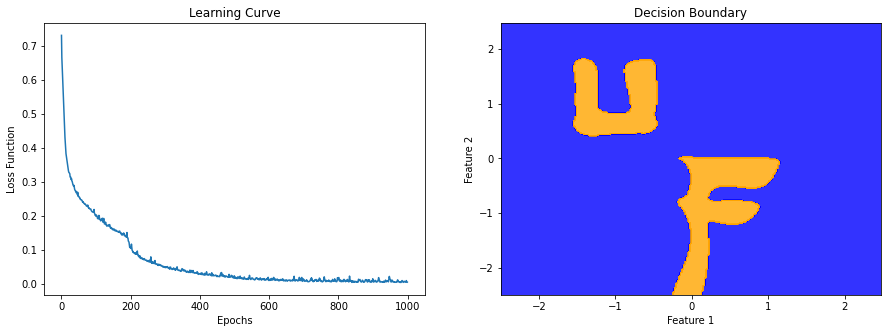

In [18]:
# Create a list with your own set of values for all of these parameters
net_hidden_layers = [(16,6)]
net_learning_rate = [0.01]
epochs = [1000]

for i in net_hidden_layers:
    for j in net_learning_rate:
        for k in epochs:
            net.set_params(hidden_layer_sizes = i, learning_rate_init = j, max_iter = k)
            net.fit(X, y)
            y_pred = net.predict(X)

            acc_score = accuracy_score(y, y_pred)
            print('-----------------------------------')
            print('Hidden Layer Architecture: ', i)
            print('Learning Rate: ', j)
            print('Number of Epochs: ', k)
            print('Accuracy = ', np.round(acc_score*100,2),'%')
            print('-----------------------------------')
            plot_LC_and_DB(X, net)

# Problem 3 - Backpropagation (15 points)

**Consider the following network: 1 input layer, 1 hidden layer and 1 output layer, each layer with 2 neurons.**

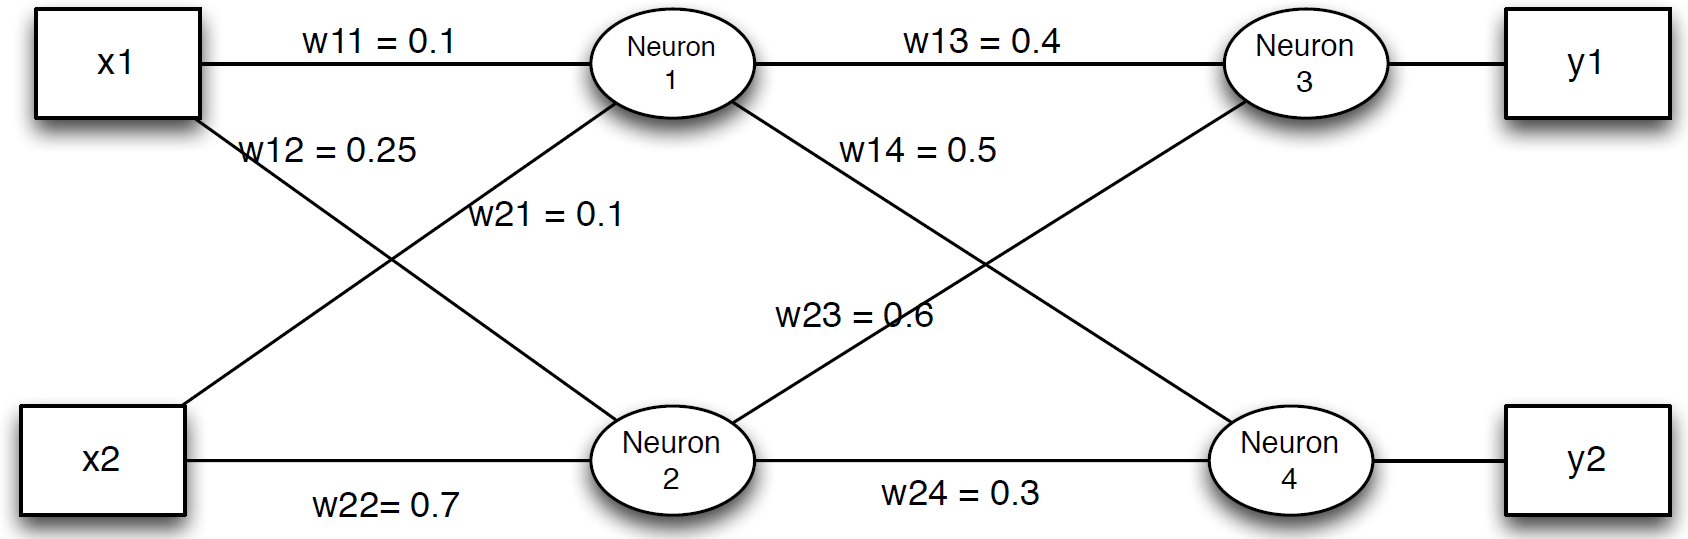

In [4]:
from IPython.display import Image
Image('network.png', width=900)

**All weights are initialized to the values shown (and there are no biases for simplicity). Consider the data point $x=[1,1]^T$ with desired output vector $d=[1,0]^T$. Complete one iteration of backpropagation by hand assuming a learning rate of $\eta=0.1$.**

**What would all the weight values be after one backpropagation iteration? Show your work.**

**Use the sigmoid activation function: $\phi(x) = \frac{1}{1 + e^{-x}}$. Note that $\frac{d\phi(x)}{dx}=\phi'(x) = \phi(x)(1-\phi(x))$.**

Check document "HW 5 Part 2 Problem 2 solution.pdf".